In [2]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import random
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pyspark.sql.types as t
import pyspark.sql.functions as f
import seaborn as sns
import pickle
from pyspark.sql.functions import col, sum
import dataframe_image as dfi
sns.set(style="darkgrid")

file_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/data/charts.csv"
# file_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/data/sample.csv"

# results_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/sample_results/"
if file_path.endswith("sample.csv"):
    results_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/sample_results/"
    images_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/sample_images/"
else:
    results_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/results/"
    images_path = "/home/olek/studia/semestr_3_AM/Big_Data/Big_Data/projekt/images/"

seed = 777
np.random.seed(seed)
random.seed(seed)

# integrity ratio by region

/tmp/ipykernel_563793/3390696078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(procentag_region, x='region', y='procent', palette='viridis', order=procentag_region['region'], ax=ax)
/tmp/ipykernel_563793/3390696078.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(procentag_region["region"], rotation=90)


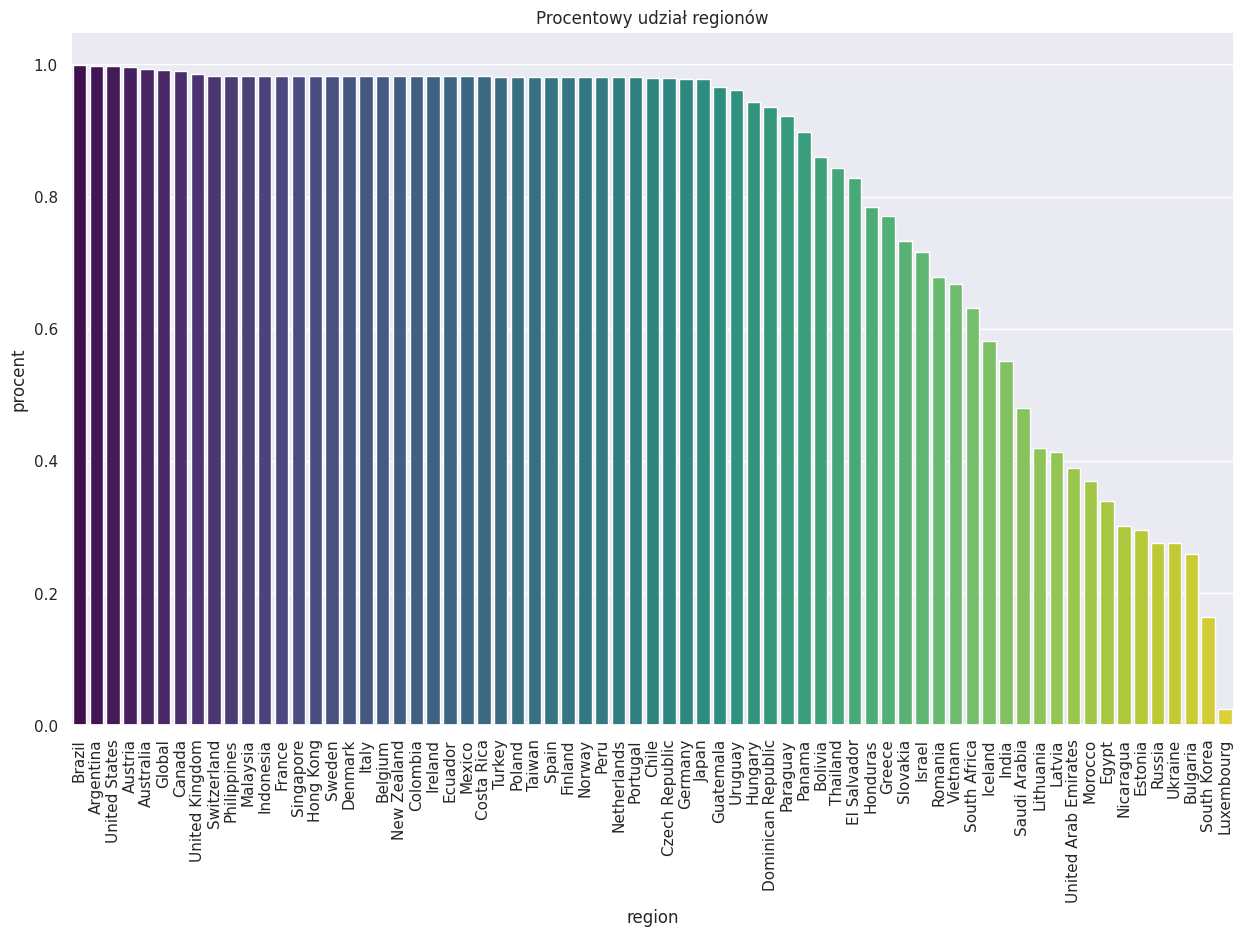

In [90]:
with open(results_path + "procentag_region.pkl", "rb") as f:
    procentag_region = pickle.load(f)

fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(procentag_region, x='region', y='procent', palette='viridis', order=procentag_region['region'], ax=ax)
ax.set_xticklabels(procentag_region["region"], rotation=90)
plt.title("Procentowy udział regionów")
plt.show()

# artist_counts

/tmp/ipykernel_563793/528903780.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(artist_counts_pd[:20], x="song_count", y='artist', palette='viridis', ax=ax)


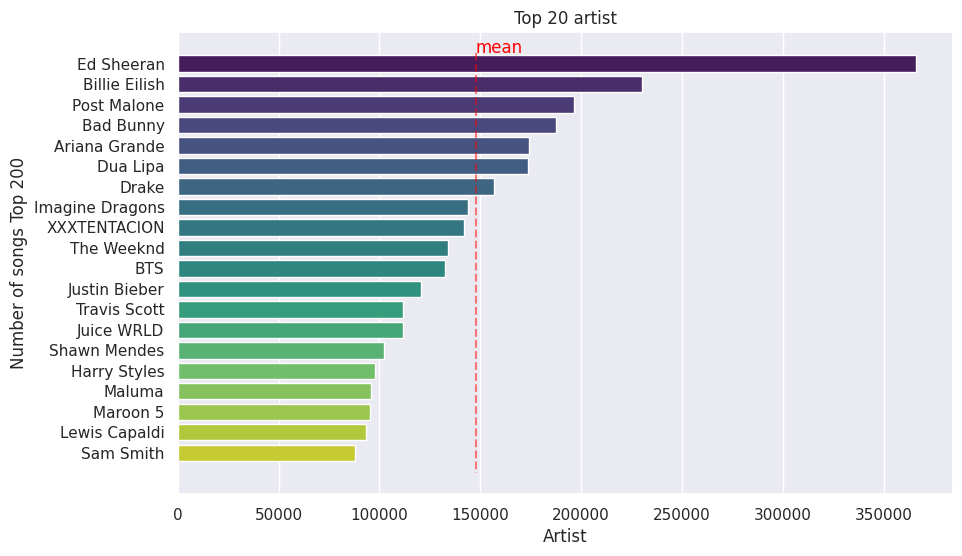

In [93]:
with open(results_path + "artist_counts.pkl", "rb") as f:
    artist_counts_pd = pickle.load(f)


fig, ax = plt.subplots(figsize=(10, 6))
# plt.barh(artist_counts_pd['artist'], artist_counts_pd['song_count'])
sns.barplot(artist_counts_pd[:20], x="song_count", y='artist', palette='viridis', ax=ax)
ax.set_title('Top 20 artist')
ax.set_xlabel('Artist')
ax.set_ylabel('Number of songs Top 200')
ax.vlines(artist_counts_pd['song_count'][:20].mean(), -0.5, 20, colors='red', linestyles='dashed', alpha=0.5)
ax.text(artist_counts_pd['song_count'][:20].mean(), -0.5, 'mean', color='red')
# ax.set_xticklabels(artist_counts_pd["artist"], rotation=90)
plt.show()

In [46]:
region_top_artist_df.groupby("region").head()

,artist,region,count
0,Marília Mendonça,Brazil,11059
1,Juice WRLD,United States,10524
2,Post Malone,United States,10436
3,Zé Neto & Cristiano,Brazil,9385
4,Henrique & Juliano,Brazil,8914
5,XXXTENTACION,United States,8807
6,Jorge & Mateus,Brazil,8395
7,Drake,United States,8226
8,Taco Hemingway,Poland,7976
9,Billie Eilish,United States,7317


/tmp/ipykernel_563793/1630580556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g= sns.catplot(data=region_top_artist_df.groupby("region").head(10),


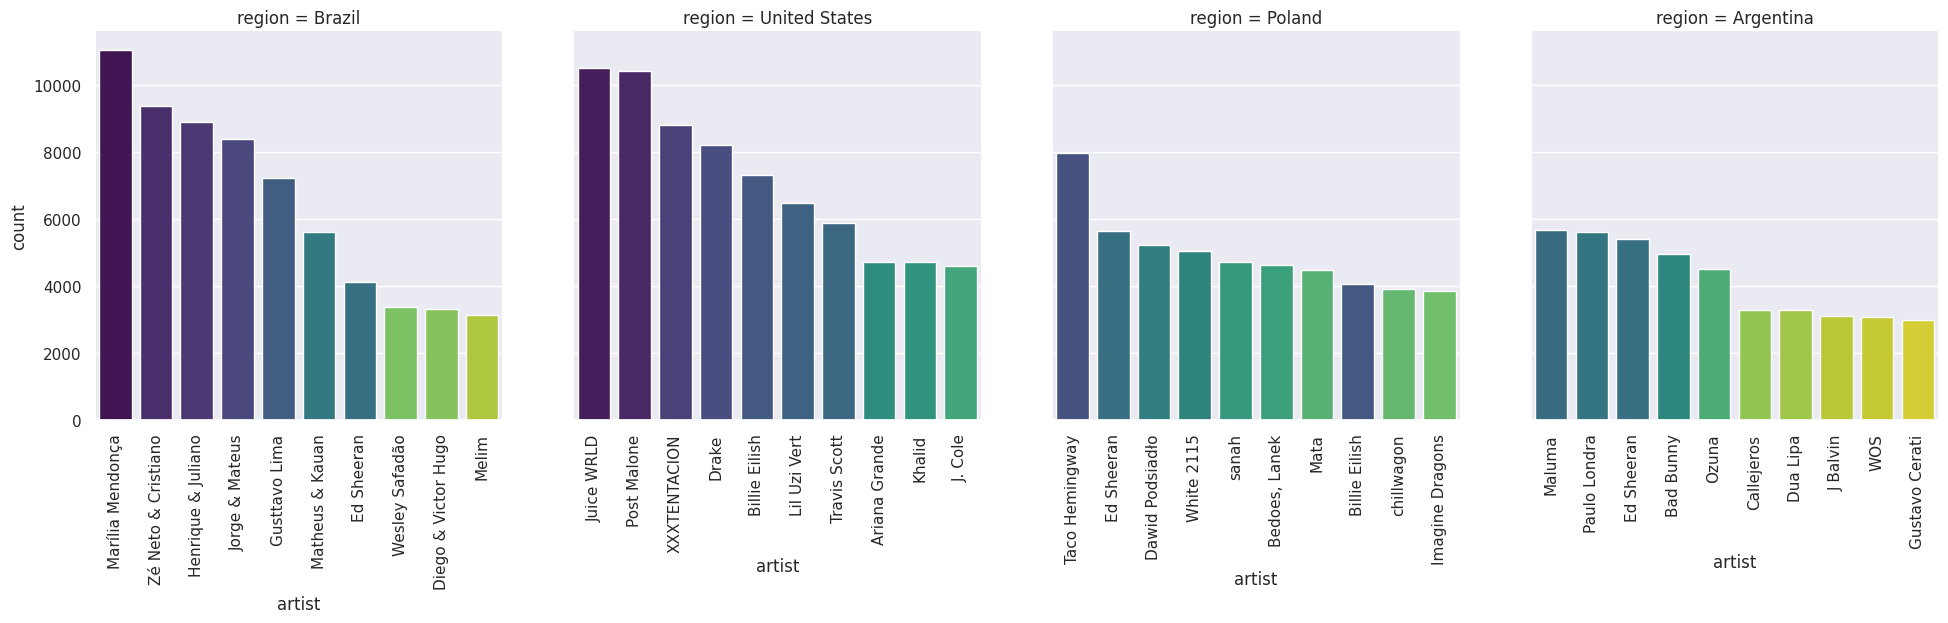

In [158]:
with open(results_path + "region_top_artist.pkl", "rb") as f:
    region_top_artist_df = pickle.load(f)
region_top_artist_df.head()
g= sns.catplot(data=region_top_artist_df.groupby("region").head(10),
            x='artist', y='count',
            col="region", col_wrap=4,
            kind="bar", 
            sharey=True, sharex=False,
            palette='viridis')
g.set_xticklabels(rotation=90)

plt.show()

## total streams

/tmp/ipykernel_563793/3511834723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(strem_per_yers_pd, x='year', y='streams', palette='viridis')


<Axes: xlabel='year', ylabel='streams'>

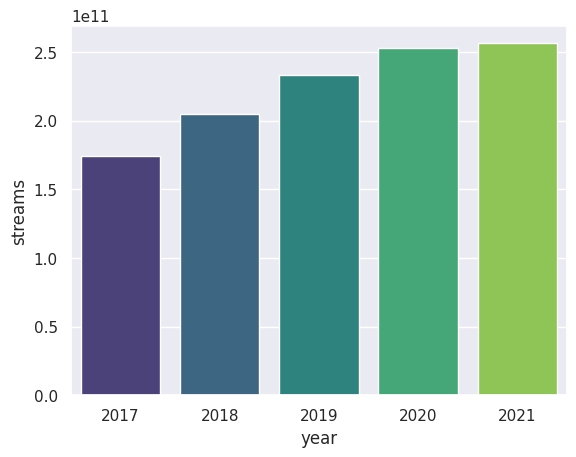

In [58]:
with open(results_path + "strem_per_year.pkl", "rb") as f:
    strem_per_yers_pd = pickle.load(f)
sns.barplot(strem_per_yers_pd, x='year', y='streams', palette='viridis')

## MOust popular artist in years

/tmp/ipykernel_563793/1395094210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(most_popoular_aritst_in_year_pd.groupby("year").head(),


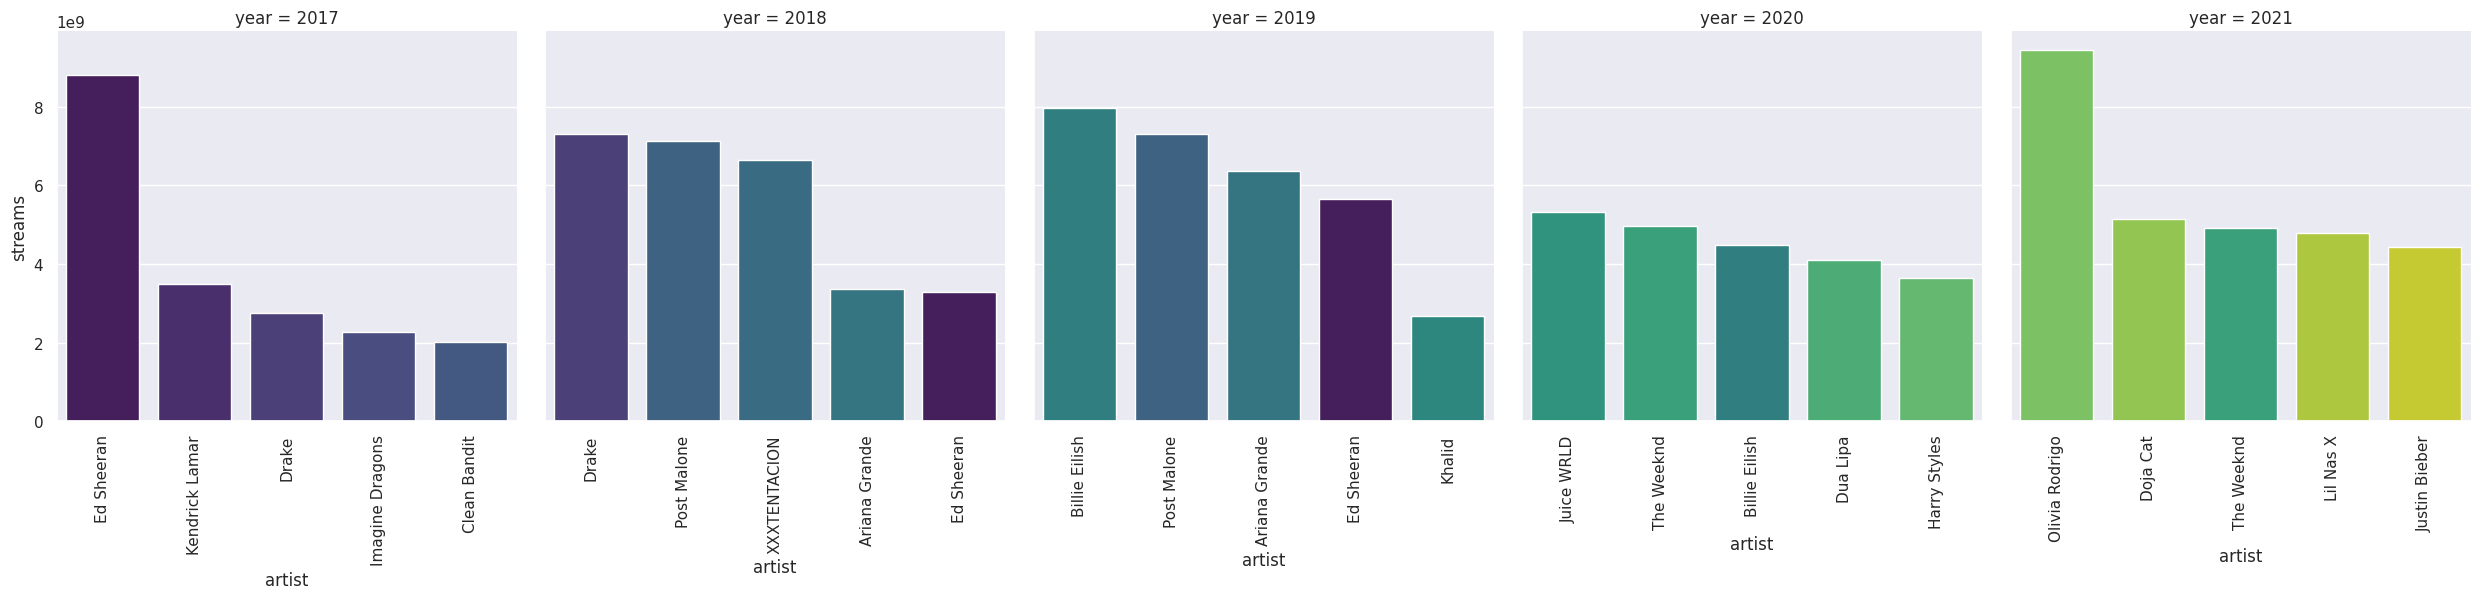

In [68]:
with open(results_path + "most_popoular_aritst_in_year.pkl", "rb") as f:
    most_popoular_aritst_in_year_pd = pickle.load(f)
    
g = sns.catplot(most_popoular_aritst_in_year_pd.groupby("year").head(),
            x='artist', y='streams',
            col="year", palette='viridis', sharex=False,
            kind='bar')
g.set_xticklabels(rotation=90)


## market_share_development

/tmp/ipykernel_5174/2722489810.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(market_share_development_pd, y="procent", x='region', col='year', palette='viridis', kind='bar', sharex=False, height=4, aspect=0.6)


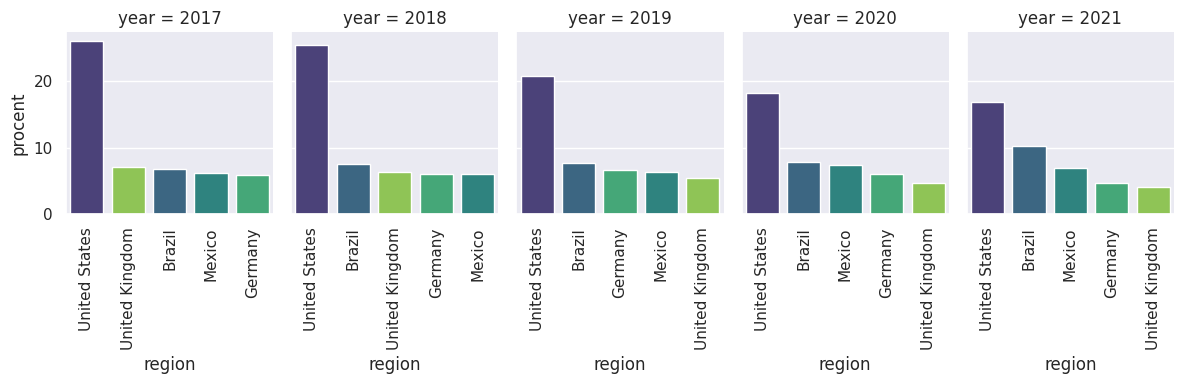

In [18]:
with open(results_path + "market_share_development.pkl", "rb") as f:
    market_share_development_pd = pickle.load(f)
sums = market_share_development_pd.groupby("year")["streams"].sum()
market_share_development_pd["procent"] = market_share_development_pd.apply(lambda x: x["streams"]/sums[x["year"]], axis=1)*100
market_share_development_pd.sort_values(by=["year","procent"], ascending=False, inplace=True)
market_share_development_pd = market_share_development_pd.groupby("year").head(5)
market_share_development_pd["region"]
# market_share_development_pd["procent"] = market_share_development_pd.groupby("year")["streams"].apply(lambda x: x/sums)
g = sns.catplot(market_share_development_pd, y="procent", x='region', col='year', palette='viridis', kind='bar', sharex=False, height=4, aspect=0.6)
g.set_xticklabels(rotation=90)
g.tight_layout()